<a href="https://colab.research.google.com/github/KESAVANAIDUKOPELLA/Regional-Sales-Analysis/blob/main/Regional_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Problem Statement**
XYZ Co's 2014-2018 sales data to identify key revenve and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

In [ ]:
from ast import increment_lineno
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [ ]:
# Assign dataframes to each sheet
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_regions = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_sales.shape

(64104, 12)

In [ ]:
print("df_sales shape: ", (df_sales.shape))
print("df_customers shape: ", (df_customers.shape))
print("df_products shape: ", (df_products.shape))
print("df_regions shape: ", (df_regions.shape))
print("df_state_regions shape: ", (df_state_regions.shape))
print("df_budgets shape: ", (df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_regions shape:  (49, 3)
df_budgets shape:  (30, 2)


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_regions.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
new_header = df_state_regions.iloc[0]
df_state_regions.columns = new_header
df_state_regions = df_state_regions[1:].reset_index(drop=True)

df_state_regions.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_state_regions.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


#### **Data Cleaning and Wrangling**

In [ ]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [ ]:
# Merge with customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
import pandas as pd

In [ ]:
# Merge with products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
# Merge with regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329


In [ ]:
#Customer Index
#Index
#id
#State Code

# Clean up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329


In [ ]:
# Convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       '2017 budgets'], dtype=object)

In [ ]:
# 4.x — DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns you want to KEEP, using their current lowercase names
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns (This step might be redundant after 6294ad26,
# but keeping for completeness based on the original cell's intent)
# df = df[cols_to_keep].copy() # This line caused an issue, let's rely on the previous selection

# 2) Rename to more Pythonic / self-explanatory names, including region
# Use the current lowercase names as keys in the renaming dictionary
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'order_quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state_code',          # two-letter state code (keeping original rename logic)
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})


# Display the cleaned DataFrame structure
display(df.head())

,order_number,order_date,customer_name,channel,order_quantity,unit_price,revenue,cost,state_name,county,state_name,us_region,lat,lon,budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [ ]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
# df[['order_date','product_name','revenue','budget']].head(10) # Remove this line

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   order_quantity  64104 non-null  int64         
 5   unit_price      64104 non-null  float64       
 6   revenue         64104 non-null  float64       
 7   cost            64104 non-null  float64       
 8   state_name      64104 non-null  object        
 9   county          64104 non-null  object        
 10  state_name      64104 non-null  object        
 11  us_region       64104 non-null  object        
 12  lat             64104 non-null  float64       
 13  lon             64104 non-null  float64       
 14  budgets         15263 non-null  float64       
 15  bu

In [ ]:
# Check for missing values in each column of the dataset
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
order_quantity,0
unit_price,0
revenue,0
cost,0
state_name,0
county,0


# **Feature Engineering**

In [ ]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['order_quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,order_quantity,unit_price,revenue,cost,state_name,county,...,us_region,lat,lon,budgets,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,6,2499.1,14994.6,1824.343,GA,Chatham County,...,South,32.08354,-81.09983,NaN,<NA>,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,11,2351.7,25868.7,1269.918,IN,Johnson County,...,Midwest,39.61366,-86.10665,NaN,<NA>,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,6,978.2,5869.2,684.740,CA,Alameda County,...,West,37.66243,-121.87468,NaN,<NA>,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,7,2338.3,16368.1,1028.852,IN,Monroe County,...,Midwest,39.16533,-86.52639,NaN,<NA>,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,8,2291.4,18331.2,1260.270,CT,Hartford County,...,Northeast,41.77524,-72.52443,NaN,<NA>,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,12,1815.7,21788.4,980.478,PA,Bucks County,...,Northeast,40.15511,-74.82877,NaN,<NA>,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,6,864.3,5185.8,579.081,IL,Cook County,...,Midwest,42.11030,-88.03424,NaN,<NA>,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,11,3953.0,43483.0,2648.510,FL,Broward County,...,South,26.24453,-80.20644,NaN,<NA>,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,7,3959.7,27717.9,2930.178,NY,Erie County,...,Northeast,42.91002,-78.74182,NaN,<NA>,20511.246,7206.654,26.0,February,2


# **Exploratory Analysis**

**EDA**

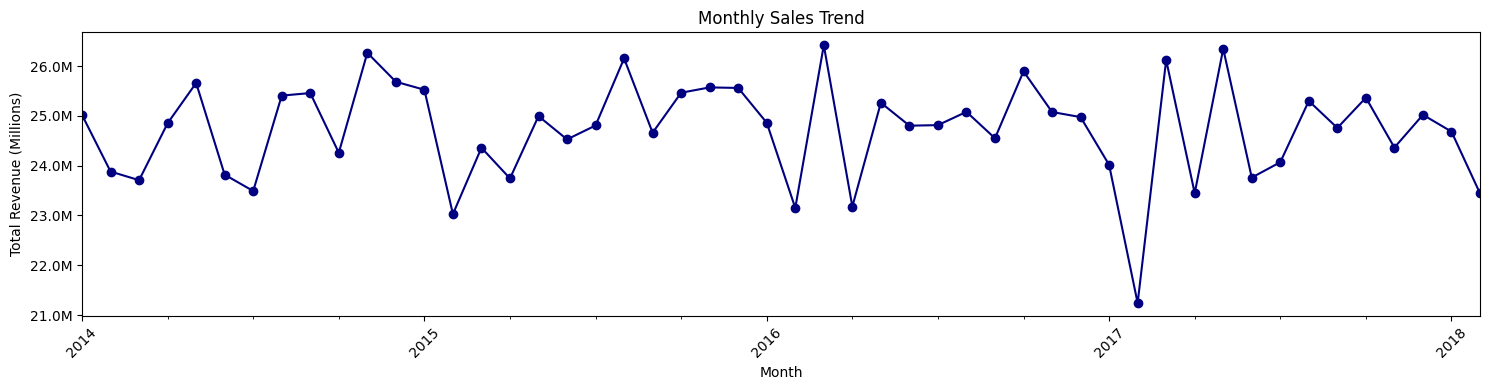

In [ ]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

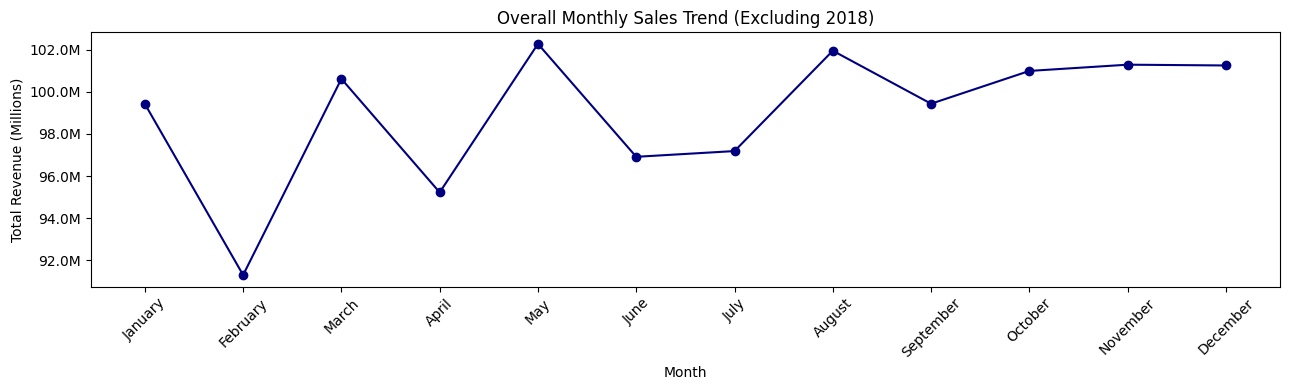

In [ ]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()

In [ ]:
# Group by original product index and sum revenue
product_revenue_by_index = df_sales.groupby('Product Description Index')['Line Total'].sum().reset_index()

# Merge with df_products to get product names
product_revenue = product_revenue_by_index.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Rename columns and calculate revenue in millions
product_revenue = product_revenue.rename(columns={'Line Total': 'revenue', 'Product Name': 'product_name'})
product_revenue['revenue_millions'] = product_revenue['revenue'] / 1_000_000

# Select the top 10 products by revenue
top_prod = product_revenue.nlargest(10, 'revenue_millions')

display(top_prod)

,Product Description Index,revenue,Index,product_name,revenue_millions
25,26,117291821.4,26,Product 26,117.291821
24,25,109473966.6,25,Product 25,109.473967
12,13,78281379.6,13,Product 13,78.281380
13,14,75390396.6,14,Product 14,75.390397
4,5,70804380.6,5,Product 5,70.804381
14,15,67331623.2,15,Product 15,67.331623
1,2,57401097.6,2,Product 2,57.401098
3,4,56701537.2,4,Product 4,56.701537
0,1,55952289.6,1,Product 1,55.952290
2,3,51764816.4,3,Product 3,51.764816


from matplotlib import pyplot as plt
top_prod['Product Description Index'].plot(kind='hist', bins=20, title='Product Description Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod['Index'].plot(kind='hist', bins=20, title='Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod['revenue_millions'].plot(kind='hist', bins=20, title='revenue_millions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod.plot(kind='scatter', x='Product Description Index', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod.plot(kind='scatter', x='revenue', y='Index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod.plot(kind='scatter', x='Index', y='revenue_millions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_prod['Product Description Index'].plot(kind='line', figsize=(8, 4), title='Product Description Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_prod['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_prod['Index'].plot(kind='line', figsize=(8, 4), title='Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_prod['revenue_millions'].plot(kind='line', figsize=(8, 4), title='revenue_millions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Product Description Index'].plot(kind='hist', bins=20, title='Product Description Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Index'].plot(kind='hist', bins=20, title='Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Product Description Index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Product Description Index', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='revenue', y='Index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Index', y='revenue_millions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Product Description Index'].plot(kind='line', figsize=(8, 4), title='Product Description Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Index'].plot(kind='line', figsize=(8, 4), title='Index')
plt.gca().spines[['top', 'right']].set_visible(False)

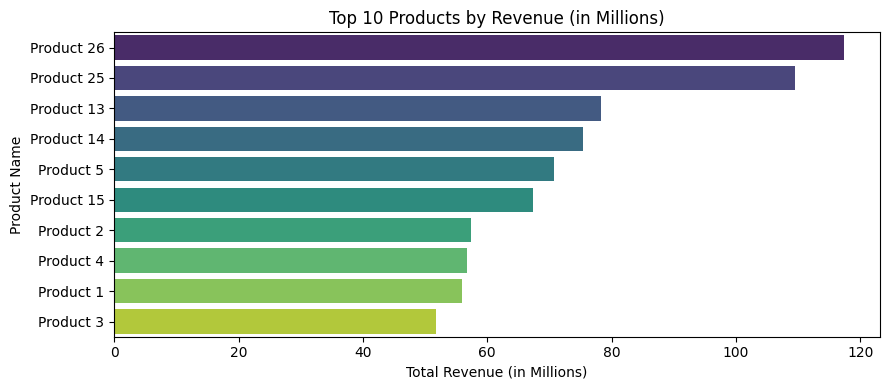

In [ ]:
# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod['revenue_millions'],    # X-axis: revenue values in millions
    y=top_prod['product_name'],     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**Top 10 Products by Avg Profit Margin**

In [ ]:
# Calculate profit for each line item in the original sales data
df_sales_profit = df_sales.merge(
    df_products[['Index', 'Product Name']],
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)
df_sales_profit['profit'] = df_sales_profit['Line Total'] - (df_sales_profit['Order Quantity'] * df_sales_profit['Total Unit Cost'])


# Calculate average profit per product
product_profit_avg = df_sales_profit.groupby('Product Name')['profit'].mean().reset_index()

# Select the top 10 products by average profit
top_margin = product_profit_avg.nlargest(10, 'profit')

display(top_margin)

,Product Name,profit
9,Product 18,8531.098029
20,Product 28,8140.428157
25,Product 5,7940.279265
2,Product 11,7905.832696
3,Product 12,7582.508989
18,Product 26,7491.009188
13,Product 21,7458.499735
24,Product 4,7395.686212
7,Product 16,7393.183670
0,Product 1,7385.486413


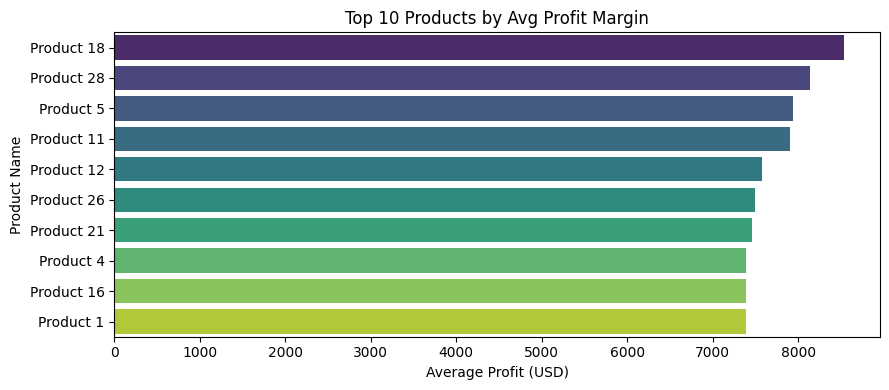

In [ ]:
# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as average profit, y-axis as product names
sns.barplot(
    x=top_margin['profit'],    # X-axis: average profit values
    y=top_margin['Product Name'],     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

**Sales by Channel (Pie Chart)**

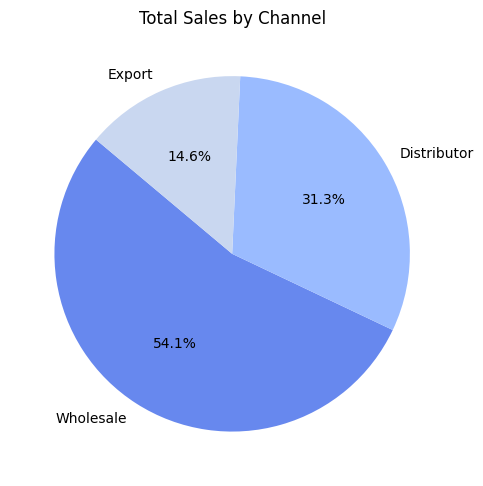

In [ ]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

**Average Order Value (AOV) Distribution**

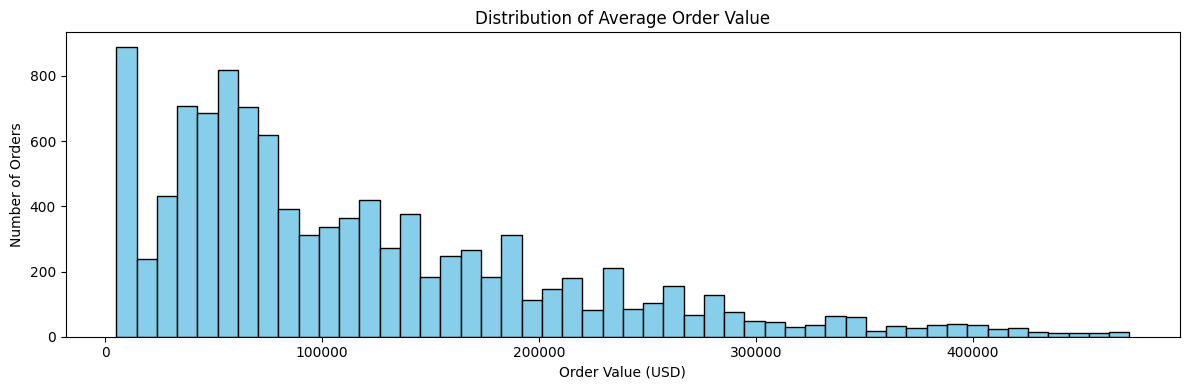

In [ ]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

**Profit Margin % vs. Unit Price**

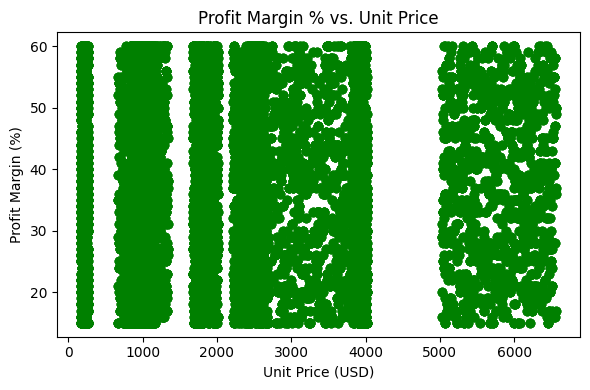

In [ ]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

**Unit Price Distribution per Product**

In [ ]:

# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

ValueError: Could not interpret value `product_name` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x400 with 0 Axes>

In [ ]:
# Prepare data for boxplot using original dataframes
# Merge df_sales with df_products to get product names and unit prices
product_unit_price = df_sales.merge(
    df_products[['Index', 'Product Name']],
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Select relevant columns and rename for clarity
product_unit_price = product_unit_price[['Product Name', 'Unit Price']].rename(columns={'Product Name': 'product_name', 'Unit Price': 'unit_price'})

# Display the head of the prepared data
display(product_unit_price.head())

,product_name,unit_price
0,Product 27,2499.1
1,Product 20,2351.7
2,Product 26,978.2
3,Product 7,2338.3
4,Product 8,2291.4


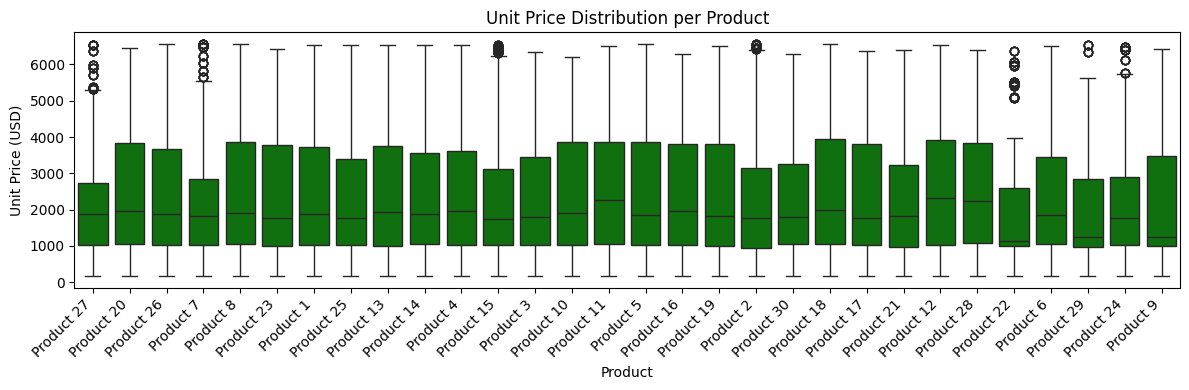

In [ ]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name using the prepared data
sns.boxplot(
    data=product_unit_price,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

**Total Sales by US Region**

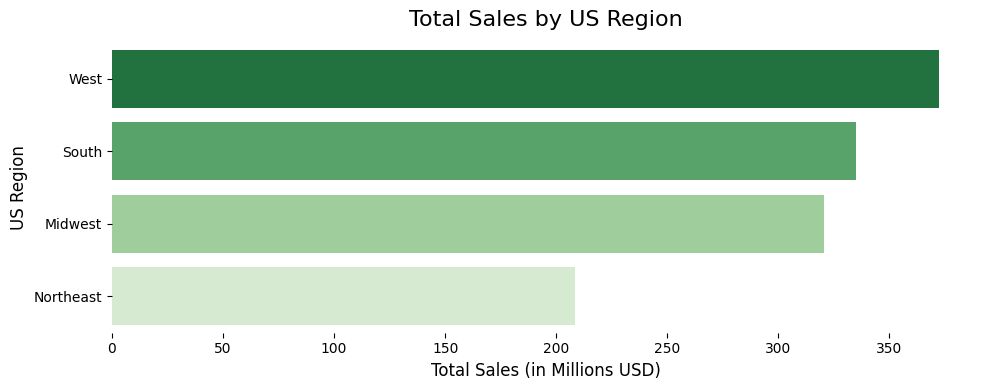

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

**Total Sales by State (Choropleth Map)**

In [ ]:
# Aggregate total sales by Delivery Region Index from original sales data
region_sales_raw = df_sales.groupby('Delivery Region Index')['Line Total'].sum().reset_index()

# Merge with df_regions to get state codes
region_sales_with_state_code = region_sales_raw.merge(
    df_regions[['id', 'state_code']],
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# Merge with df_state_regions to get state names
state_sales_aggregated = region_sales_with_state_code.merge(
    df_state_regions[['State Code', 'State']],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Group by State name and sum the total sales
state_sales = state_sales_aggregated.groupby('State')['Line Total'].sum().reset_index()

# Rename and calculate revenue in millions
state_sales = state_sales.rename(columns={'Line Total': 'revenue', 'State': 'state_name'})
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

display(state_sales.head())

,state_name,revenue,revenue_m
0,Alabama,10697648.8,10.697649
1,Arizona,23388246.1,23.388246
2,Arkansas,9754690.8,9.754691
3,California,228785436.0,228.785436
4,Colorado,27683776.9,27.683777


In [ ]:
import plotly.express as px

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state_name',            # column with state names
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

**Top 10 States by Revenue and Order Count**

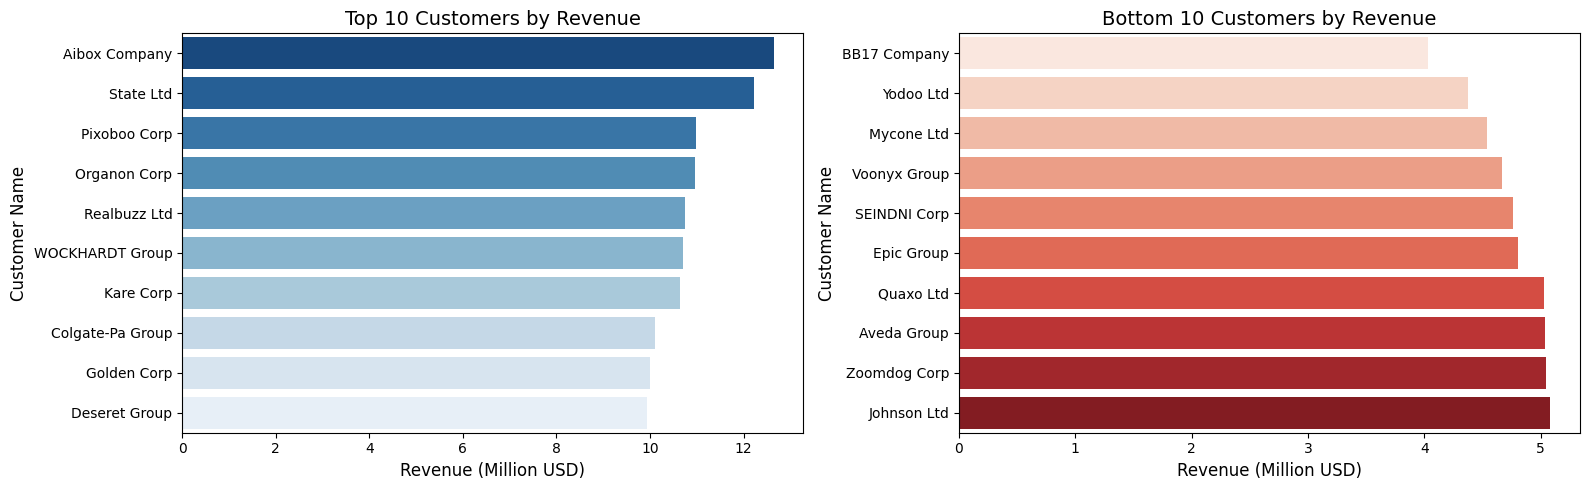

In [ ]:
 #🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

**Average Profit Margin by Channel**

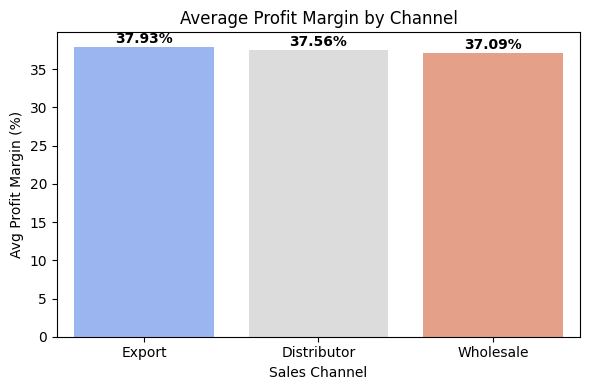

In [ ]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

**Top and Bottom 10 Customers by Revenue**

In [ ]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

ValueError: Grouper for 'state_name' not 1-dimensional

In [ ]:
# Use the previously created state_sales DataFrame which has total revenue per state
# state_sales was created in cell 76454e85

# Calculate order count per state using original sales and region data
state_order_count_aggregated = region_sales_with_state_code.merge(
    df_state_regions[['State Code', 'State']],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Group by State name and count unique order numbers
state_order_count = state_order_count_aggregated.groupby('State')['Delivery Region Index'].count().reset_index() # Count of region indices is a proxy for order count grouped by state

# Rename columns
state_order_count = state_order_count.rename(columns={'Delivery Region Index': 'order_count', 'State': 'state_name'})

# Merge state revenue and order count dataframes
state_analysis = state_sales.merge(
    state_order_count,
    how='left',
    on='state_name'
)

# Select the top 10 states by revenue
top_states_by_revenue = state_analysis.nlargest(10, 'revenue')

display(top_states_by_revenue)

,state_name,revenue,revenue_m,order_count
3,California,228785436.0,228.785436,186
11,Illinois,111050965.7,111.050966,85
8,Florida,90204679.5,90.204679,73
41,Texas,84011903.0,84.011903,68
30,New York,55534960.0,55.534960,44
12,Indiana,54601690.2,54.601690,46
28,New Jersey,46830956.5,46.830956,38
5,Connecticut,44251228.7,44.251229,34
20,Michigan,39025315.8,39.025316,32
19,Massachusetts,35011942.1,35.011942,27


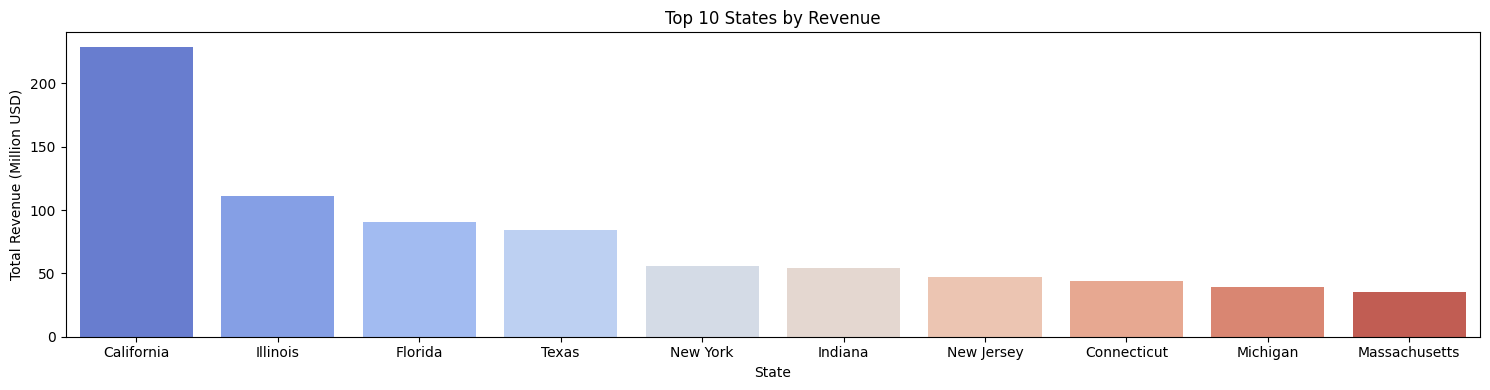

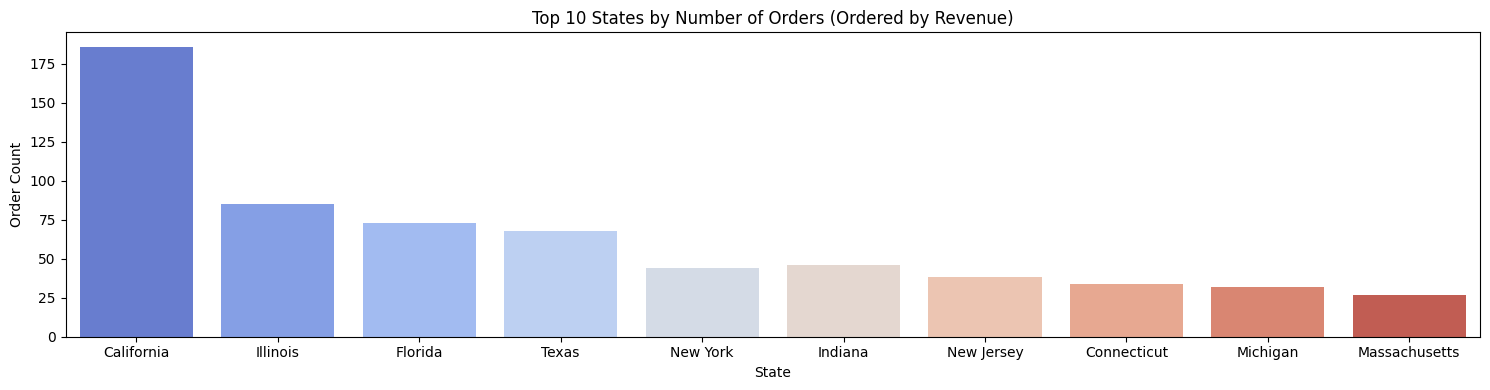

In [ ]:
# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=top_states_by_revenue['state_name'],                   # X-axis: state names
    y=top_states_by_revenue['revenue_m'],        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=top_states_by_revenue['state_name'],                   # X-axis: state names (using the order from top revenue)
    y=top_states_by_revenue['order_count'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders (Ordered by Revenue)')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

**Customer Segmentation: Revenue vs. Profit Margin**

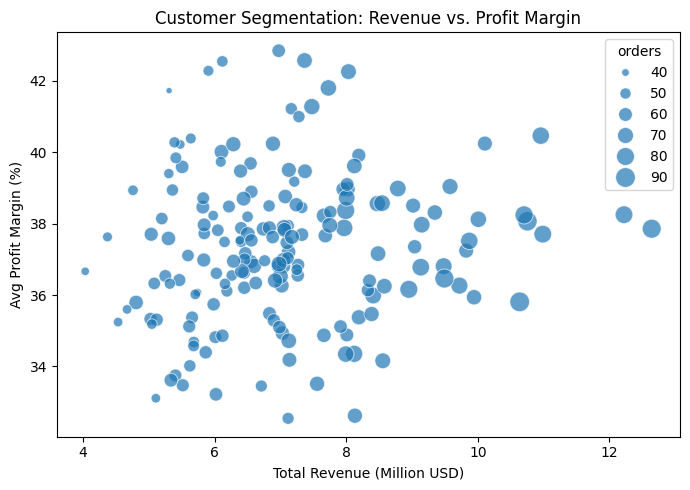

In [ ]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

**Correlation Heatmap of Numeric Features**

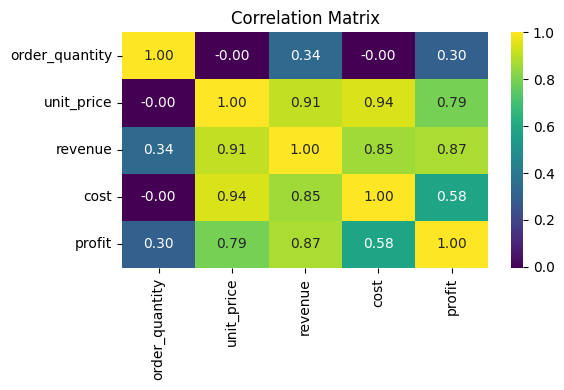

In [ ]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

**Saving Pre-Processed Dataframe**

In [ ]:
df

,order_number,order_date,customer_name,channel,order_quantity,unit_price,revenue,cost,state_name,county,...,lat,lon,budgets,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,6,2499.1,14994.6,1824.343,GA,Chatham County,...,32.08354,-81.09983,NaN,<NA>,10946.058,4048.542,27.0,January,1,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,11,2351.7,25868.7,1269.918,IN,Johnson County,...,39.61366,-86.10665,NaN,<NA>,13969.098,11899.602,46.0,January,1,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,6,978.2,5869.2,684.740,CA,Alameda County,...,37.66243,-121.87468,NaN,<NA>,4108.440,1760.760,30.0,January,1,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,7,2338.3,16368.1,1028.852,IN,Monroe County,...,39.16533,-86.52639,NaN,<NA>,7201.964,9166.136,56.0,January,1,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,8,2291.4,18331.2,1260.270,CT,Hartford County,...,41.77524,-72.52443,NaN,<NA>,10082.160,8249.040,45.0,January,1,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,12,1815.7,21788.4,980.478,PA,Bucks County,...,40.15511,-74.82877,NaN,<NA>,11765.736,10022.664,46.0,February,2,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,6,864.3,5185.8,579.081,IL,Cook County,...,42.11030,-88.03424,NaN,<NA>,3474.486,1711.314,33.0,February,2,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,11,3953.0,43483.0,2648.510,FL,Broward County,...,26.24453,-80.20644,NaN,<NA>,29133.610,14349.390,33.0,February,2,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,7,3959.7,27717.9,2930.178,NY,Erie County,...,42.91002,-78.74182,NaN,<NA>,20511.246,7206.654,26.0,February,2,2018-02


In [ ]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)